In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from trtpy.pid import roc_curve
import numpy as np
from root_pandas import read_root

Welcome to JupyROOT 6.10/00


In [2]:
df_el = read_root('/Users/ddavis/jee/data-treeOutput/sample.root','jdTree')
df_mu = read_root('/Users/ddavis/jmumu/data-treeOutput/sample.root','jdTree')

In [3]:
cuts = {
    "1,2" : ((df_el.p < 2000) & (df_el.p >= 1000), (df_mu.p < 2000) & (df_mu.p >= 1000)),
    "2,3" : ((df_el.p < 3000) & (df_el.p >= 2000), (df_mu.p < 3000) & (df_mu.p >= 2000)),
    "3,4" : ((df_el.p < 4000) & (df_el.p >= 3000), (df_mu.p < 4000) & (df_mu.p >= 3000)),
    "2,5" : ((df_el.p < 5000) & (df_el.p >= 2000), (df_mu.p < 5000) & (df_mu.p >= 2000)),
    "5,i" : ((df_el.p < 5.e8) & (df_el.p >= 5000), (df_mu.p < 5.e8) & (df_mu.p >= 5000))
}

In [5]:
curves = {}
for ck, cv in cuts.items():
    sigs = (df_el[cv[0]][prob].values for prob in ["eProbHT","eProbToT","eProbComb"])
    bkgs = (df_mu[cv[1]][prob].values for prob in ["eProbHT","eProbToT","eProbComb"])
    for i, (sig, bkg) in enumerate(zip(sigs,bkgs)):
        curves[str(i)+'__'+ck] = roc_curve(sig,bkg)

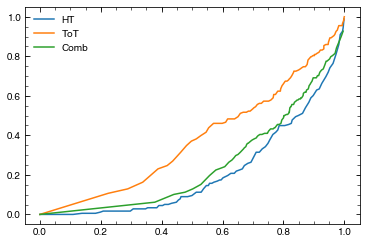

In [34]:
fig, ax = plt.subplots()
curves["0__1,2"].plot(on=ax,label="HT")
curves["1__1,2"].plot(on=ax,label="ToT")
curves["2__1,2"].plot(on=ax,label="Comb")
l = ax.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cd64128>]], dtype=object)

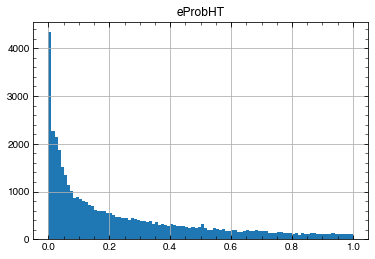

In [39]:
df_mu.hist('eProbHT',bins=100)